In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import LinearSVR


from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

# Linear Model

In [2]:
def prepare_df(features):
  news = pd.read_csv(f'/content/drive/MyDrive/Team_Daccord/data/{stock}_news_sentiment.csv', index_col=0).sort_values('date').set_index('date')
  sp = pd.read_csv('/content/drive/MyDrive/Team_Daccord/data/SP500.csv')
  sp['Date'] = pd.to_datetime(sp['Date'], format="%m/%d/%y")
  sp = sp.sort_values('Date').set_index('Date')
  sp.columns = ['sp_Open', 'sp_High', 'sp_Low', 'sp_Close'] 
  fin = pd.read_csv(f'/content/drive/MyDrive/Team_Daccord/data/{stock}_financial.csv', index_col=0)
  a = pd.DataFrame(pd.date_range(start='2009-10-01', end='2021-07-01').strftime("%Y-%m-%d"), columns=['Date']).merge(fin, left_on='Date', right_on='date', how='left').fillna(method='pad')
  b = pd.to_datetime(a['Date'],format="%Y-%m-%d")
  c = pd.to_datetime(a['date'],format="%Y-%m-%d")
  a['day_delta'] = (b - c).apply(lambda x: x.days).values
  a = a.set_index('Date')
  df = pd.read_csv(f'/content/drive/MyDrive/Team_Daccord/data/{stock}_historical.csv',index_col=0).sort_values('date').set_index('date')
  df = sp.join(df, how='left').join(news, how='left').join(a[list(fin.columns)+['day_delta']], how='left')
  df = df.fillna(0)

  df = df[df.index > '2013-01-01']

  data = df.loc[:, features].to_numpy()

  data_y = df.loc[:,['adjClose']].to_numpy()
  
  return data, data_y


def prepare_data():

  sc = MinMaxScaler()
  sc_y = MinMaxScaler()
  x = sc.fit_transform(data)
  y = sc_y.fit_transform(data_y)

  train_size = int(len(y) * 0.90)
  test_size = len(y) - train_size

  dataX = np.array(x)
  dataY = np.array(y)

  trainX = np.array(x[0:train_size])
  trainY = np.array(y[0:train_size])

  testX = np.array(x[train_size:len(x)])
  testY = np.array(y[train_size:len(y)])

  return trainX, trainY, testX, testY, sc_y, train_size

def run(features):
  model = LR().fit(trainX, trainY)
  return model

def plot():
  data_predict = model.predict(np.concatenate([trainX,testX]))
  dataY_plot = np.concatenate([trainY,testY])

  data_predict = sc_y.inverse_transform(data_predict)
  dataY_plot = sc_y.inverse_transform(dataY_plot.reshape(-1, 1))

  plt.figure(figsize=(20,8))
  plt.axvline(x=train_size, c='r', linestyle='--')

  plt.plot(dataY_plot)
  plt.plot(data_predict)
  plt.suptitle('Time-Series Prediction')
  plt.show()
  print(MSE(dataY_plot, data_predict)) 
  print(R2(dataY_plot, data_predict))

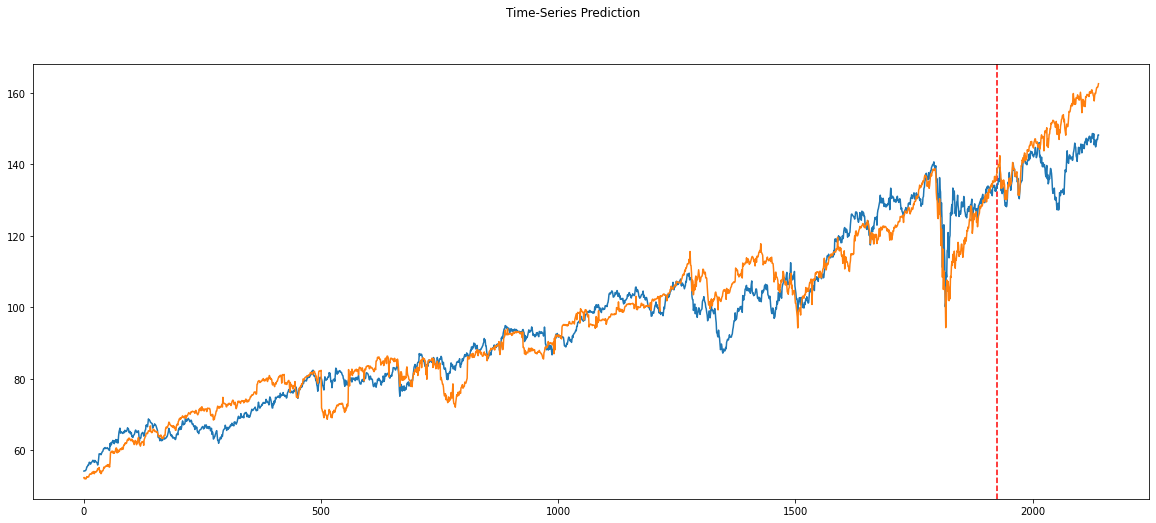

39.47151881300501
0.9338654530619862


In [3]:
seed = 11
stock = 'PEP'
np.random.seed(seed)  # Numpy module.


sentiments = [
            'pos',
           'neg', 
          'pos - neg', 
          'nrc anger',
           'nrc anticipation', 'nrc disgust', 'nrc fear', 'nrc joy', 'nrc neg',
           'nrc pos', 'nrc sadness', 'nrc surprise', 'nrc trust'
          ]


features = ['volume', 'sp_Close'] + sentiments  + ['revenue', 'grossProfit', 'netIncome', 'day_delta']

data, data_y = prepare_df(features)
trainX, trainY, testX, testY, sc_y, train_size = prepare_data()
model = run(features)
plot()

# SVM

In [4]:
def run(features):
  model = LinearSVR(max_iter=3000).fit(trainX, trainY.reshape(trainY.shape[0],))
  return model
def plot():
  data_predict = model.predict(np.concatenate([trainX,testX]))
  dataY_plot = np.concatenate([trainY,testY])

  data_predict = sc_y.inverse_transform(data_predict.reshape(-1, 1))
  dataY_plot = sc_y.inverse_transform(dataY_plot.reshape(-1, 1))

  plt.figure(figsize=(20,8))
  plt.axvline(x=train_size, c='r', linestyle='--')

  plt.plot(dataY_plot)
  plt.plot(data_predict)
  plt.suptitle('Time-Series Prediction')
  plt.show()
  print(MSE(dataY_plot, data_predict)) 
  print(R2(dataY_plot, data_predict))

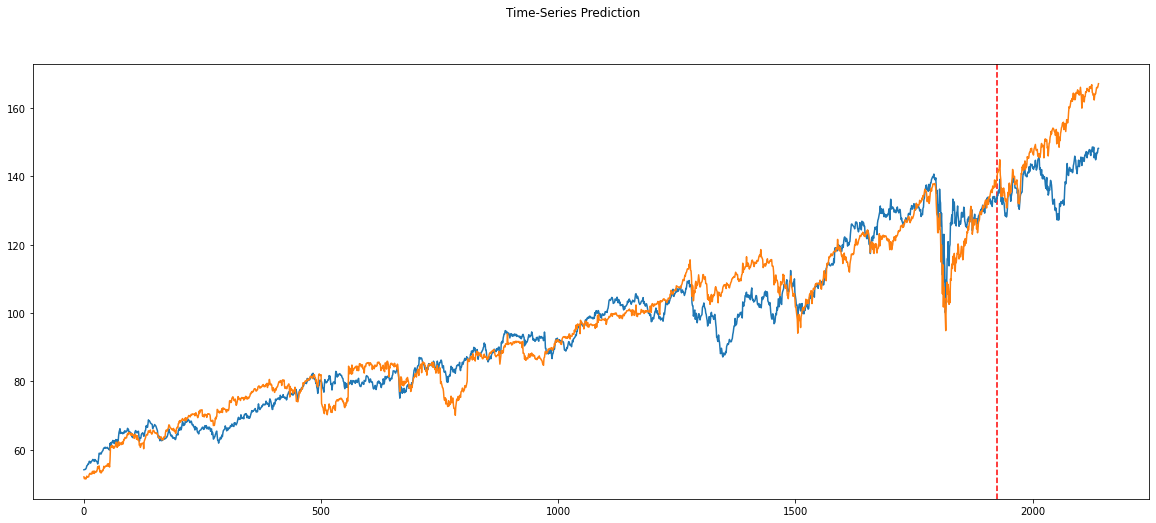

48.52810362643543
0.9186911412682233


In [5]:
seed = 11
np.random.seed(seed)  # Numpy module.


sentiments = [
            'pos',
           'neg', 
          'pos - neg', 
          'nrc anger',
           'nrc anticipation', 'nrc disgust', 'nrc fear', 'nrc joy', 'nrc neg',
           'nrc pos', 'nrc sadness', 'nrc surprise', 'nrc trust'
          ]


features = ['volume', 'sp_Close'] + sentiments + ['revenue', 'grossProfit', 'netIncome', 'day_delta']

data, data_y = prepare_df(features)
trainX, trainY, testX, testY, sc_y, train_size = prepare_data()
model = run(features)
plot()

# Random Forest

In [6]:
def run(features):
  model = RFR().fit(trainX, trainY)
  return model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


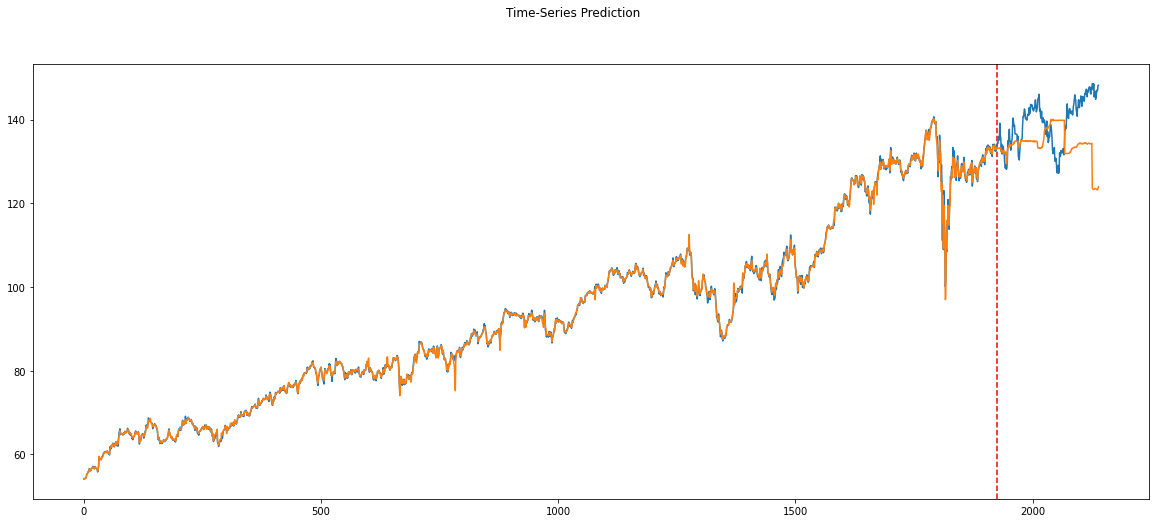

9.363756453720875
0.9843110219893363


In [7]:
seed = 11
np.random.seed(seed)  # Numpy module.


sentiments = [
            'pos',
           'neg', 
          'pos - neg', 
          'nrc anger',
           'nrc anticipation', 'nrc disgust', 'nrc fear', 'nrc joy', 'nrc neg',
           'nrc pos', 'nrc sadness', 'nrc surprise', 'nrc trust'
          ]


features = ['volume', 'sp_Close'] + sentiments + ['revenue', 'grossProfit', 'netIncome', 'day_delta']

data, data_y = prepare_df(features)
trainX, trainY, testX, testY, sc_y, train_size = prepare_data()
model = run(features)
plot()

# XGBoost

In [8]:
import xgboost as xg
def run(features):
  model = xg.XGBRegressor().fit(trainX, trainY)
  return model

def plot():
  data_predict = model.predict(np.concatenate([trainX,testX]))
  dataY_plot = np.concatenate([trainY,testY])

  data_predict = sc_y.inverse_transform(data_predict.reshape(-1, 1))
  dataY_plot = sc_y.inverse_transform(dataY_plot.reshape(-1, 1))

  plt.figure(figsize=(20,8))
  plt.axvline(x=train_size, c='r', linestyle='--')

  plt.plot(dataY_plot)
  plt.plot(data_predict)
  plt.suptitle('Time-Series Prediction')
  plt.show()
  print(MSE(dataY_plot, data_predict)) 
  print(R2(dataY_plot, data_predict))

[07:12:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


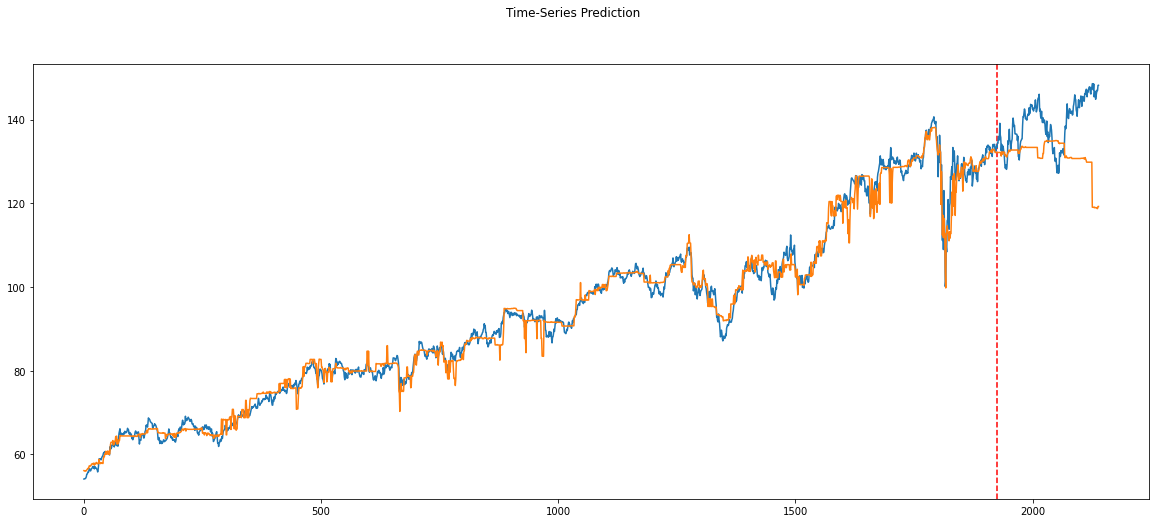

17.127480718447103
0.971302898607214


In [9]:
seed = 11
np.random.seed(seed)  # Numpy module.


sentiments = [
            'pos',
           'neg', 
          'pos - neg', 
          'nrc anger',
           'nrc anticipation', 'nrc disgust', 'nrc fear', 'nrc joy', 'nrc neg',
           'nrc pos', 'nrc sadness', 'nrc surprise', 'nrc trust'
          ]


features = ['volume', 'sp_Close'] + sentiments + ['revenue', 'grossProfit', 'netIncome', 'day_delta']

data, data_y = prepare_df(features)
trainX, trainY, testX, testY, sc_y, train_size = prepare_data()
model = run(features)
plot()

# NN

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
import seaborn as sns
import random

seed=11
seq_length = 30
stock ='PEP'

In [11]:
def prepare_df(features):
  news = pd.read_csv(f'/content/drive/MyDrive/Team_Daccord/data/{stock}_news_sentiment.csv', index_col=0).sort_values('date').set_index('date')
  sp = pd.read_csv('/content/drive/MyDrive/Team_Daccord/data/SP500.csv')
  sp['Date'] = pd.to_datetime(sp['Date'], format="%m/%d/%y")
  sp = sp.sort_values('Date').set_index('Date')
  sp.columns = ['sp_Open', 'sp_High', 'sp_Low', 'sp_Close'] 
  fin = pd.read_csv(f'/content/drive/MyDrive/Team_Daccord/data/{stock}_financial.csv', index_col=0)
  a = pd.DataFrame(pd.date_range(start='2009-10-01', end='2021-07-01').strftime("%Y-%m-%d"), columns=['Date']).merge(fin, left_on='Date', right_on='date', how='left').fillna(method='pad')
  b = pd.to_datetime(a['Date'],format="%Y-%m-%d")
  c = pd.to_datetime(a['date'],format="%Y-%m-%d")
  a['day_delta'] = (b - c).apply(lambda x: x.days).values
  a = a.set_index('Date')
  df = pd.read_csv(f'/content/drive/MyDrive/Team_Daccord/data/{stock}_historical.csv',index_col=0).sort_values('date').set_index('date')
  df = sp.join(df, how='left').join(news, how='left').join(a[list(fin.columns)+['day_delta']], how='left')
  df = df.fillna(0)

  df = df[df.index > '2013-01-01']
  res = {}
  if features['seq']:
    data_seq = df.loc[:, features['seq']].to_numpy()
    res['seq'] = data_seq
  if features['tmp']:
    data_tmp = df.loc[:, features['tmp']].to_numpy()
    res['tmp'] = data_tmp
  if features['tmp2']:
    data_tmp2 = df.loc[:, features['tmp2']].to_numpy()
    res['tmp2'] = data_tmp2
  data_y = df.loc[:,['adjClose']].to_numpy()
  
  return res, data_y

def prepare_data():
  def sliding_windows(data_seq, seq_length):
      x = []
      for i in range(len(data_seq)-seq_length):
          _x = data_seq[i:(i+seq_length)]
          x.append(_x)
      return np.array(x)

  sc_y = MinMaxScaler()
  y = sc_y.fit_transform(data_y)[seq_length:].reshape(-1, 1)
  train_size = int(len(y) * 0.90)
  test_size = len(y) - train_size
  dataY = Variable(torch.Tensor(np.array(y)))
  trainY = Variable(torch.Tensor(np.array(y[0:train_size])))
  testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

  trainX = {}
  testX = {}
  if features['seq']:
    sc_seq = MinMaxScaler()
    x_seq = sliding_windows(sc_seq.fit_transform(res['seq']), seq_length)
    dataX_seq = Variable(torch.Tensor(np.array(x_seq)))
    trainX_seq = Variable(torch.Tensor(np.array(x_seq[0:train_size])))
    trainX['seq'] = trainX_seq
    testX_seq = Variable(torch.Tensor(np.array(x_seq[train_size:len(x_seq)])))
    testX['seq'] = testX_seq
  if features['tmp']:
    sc_tmp = MinMaxScaler()
    x_tmp = sc_tmp.fit_transform(res['tmp'])[seq_length:]
    dataX_tmp = Variable(torch.Tensor(np.array(x_tmp)))
    trainX_tmp = Variable(torch.Tensor(np.array(x_tmp[0:train_size])))
    trainX['tmp'] = trainX_tmp
    testX_tmp = Variable(torch.Tensor(np.array(x_tmp[train_size:len(x_tmp)])))
    testX['tmp'] = testX_tmp
  if features['tmp2']:
    sc_tmp2 = MinMaxScaler()
    x_tmp2 = sc_tmp2.fit_transform(res['tmp2'])[seq_length:]
    dataX_tmp2 = Variable(torch.Tensor(np.array(x_tmp2)))
    trainX_tmp2 = Variable(torch.Tensor(np.array(x_tmp2[0:train_size])))
    trainX['tmp2'] = trainX_tmp2
    testX_tmp2 = Variable(torch.Tensor(np.array(x_tmp2[train_size:len(x_tmp2)])))
    testX['tmp2'] = testX_tmp2

  return trainX, testX, trainY, testY, sc_y, train_size


class system(nn.Module):

    def __init__(self, num_classes, hidden_size, num_layers,
                 up_input_size, down_input_size, down2_input_size):
        super(system, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.up_input_size = up_input_size 
        self.up = nn.LSTM(input_size=up_input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.down_input_size = down_input_size
        self.down = torch.nn.Sequential(
                              torch.nn.Linear(down_input_size, 10),
                              torch.nn.Sigmoid(),
                              torch.nn.Linear(10, 3),
                              torch.nn.Tanh()
                          )
        self.down2_input_size = down2_input_size
        self.down2 = torch.nn.Sequential(
                              torch.nn.Linear(down2_input_size, 6),
                              torch.nn.Sigmoid(),
                              torch.nn.Linear(6, 3),
                              torch.nn.Tanh()
                          )
        self.final = torch.nn.Sequential(
                              torch.nn.Linear((up_input_size!=0)*1+(down_input_size!=0)*3+(down2_input_size!=0)*3, 1)
                          )
        
        self.fc = nn.Linear(hidden_size*num_layers, num_classes)

    def forward(self, trainX):
        out_lst = []
        if self.up_input_size!=0:
          x_seq = trainX['seq']
          h_0 = Variable(torch.zeros(
              self.num_layers, x_seq.size(0), self.hidden_size))
          c_0 = Variable(torch.zeros(
              self.num_layers, x_seq.size(0), self.hidden_size))
          # Propagate input through LSTM
          ula, (h_out, _) = self.up(x_seq, (h_0, c_0))
          # if multiple layers
          h_out = torch.cat((h_out[0], h_out[1]), 1)
          up_out = self.fc(h_out)
          out_lst.append(up_out)
        if self.down_input_size!=0:
          x_tmp = trainX['tmp']
          down_out = self.down(x_tmp)
          out_lst.append(down_out)
        if self.down2_input_size!=0:
          x_tmp2 = trainX['tmp2']
          down2_out = self.down2(x_tmp2)
          out_lst.append(down2_out)
        
        out = self.final(torch.cat(out_lst,1))

        return out


def run():
  num_epochs = 2000
  learning_rate = 0.01
  if features['seq']:
    up_input_size = trainX['seq'].shape[2]
  else:
    up_input_size = 0
  if features['tmp']:
    down_input_size = trainX['tmp'].shape[1]
  else:
    down_input_size = 0
  if features['tmp2']:
    down2_input_size = trainX['tmp2'].shape[1]
  else:
    down2_input_size = 0  

  hidden_size = 5
  num_layers = 2
  num_classes = 1

  model = system(num_classes, hidden_size, num_layers,
                 up_input_size, down_input_size, down2_input_size)
  
  criterion = torch.nn.MSELoss()    # mean-squared error for regression
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

  # Train the model
  for epoch in range(num_epochs):
      outputs = model(trainX)

      optimizer.zero_grad()
      
      # obtain the loss function
      loss = criterion(outputs, trainY)
      
      loss.backward()
      
      optimizer.step()
      if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
    
  return model

def plot():
  model.eval()
  all = {}
  for i in trainX.keys():
    all[i] = torch.cat((trainX[i], testX[i]))
  
  train_predict = model(all)
  data_predict = train_predict.data.numpy()
  dataY_plot = torch.cat((trainY, testY)).data.numpy()

  data_predict = sc_y.inverse_transform(data_predict)
  dataY_plot = sc_y.inverse_transform(dataY_plot.reshape(-1, 1))

  plt.figure(figsize=(20,8))
  plt.axvline(x=train_size, c='r', linestyle='--')

  plt.plot(dataY_plot)
  plt.plot(data_predict)
  plt.suptitle('Time-Series Prediction')
  plt.show()

  print(MSE(dataY_plot, data_predict))
  print(R2(dataY_plot, data_predict))

Epoch: 0, loss: 0.24525
Epoch: 100, loss: 0.00508
Epoch: 200, loss: 0.00382
Epoch: 300, loss: 0.00346
Epoch: 400, loss: 0.00309
Epoch: 500, loss: 0.00277
Epoch: 600, loss: 0.00256
Epoch: 700, loss: 0.00257
Epoch: 800, loss: 0.00249
Epoch: 900, loss: 0.00251
Epoch: 1000, loss: 0.00248
Epoch: 1100, loss: 0.00245
Epoch: 1200, loss: 0.00234
Epoch: 1300, loss: 0.00243
Epoch: 1400, loss: 0.00271
Epoch: 1500, loss: 0.00215
Epoch: 1600, loss: 0.00217
Epoch: 1700, loss: 0.00206
Epoch: 1800, loss: 0.00209
Epoch: 1900, loss: 0.00193


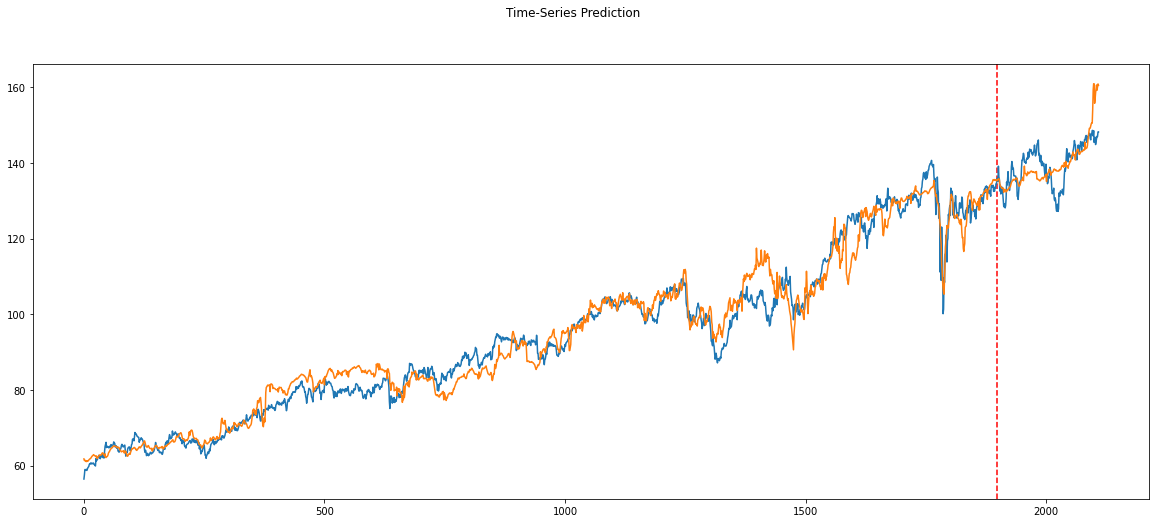

17.446182
0.9699326482119738


In [13]:
stock = 'PEP'
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
np.random.seed(seed)  # Numpy module.
random.seed(seed)  # Python random module.
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

sentiments = [
            'pos',
          'neg', 
          'pos - neg', 
          'nrc anger',
          'nrc anticipation', 'nrc disgust', 'nrc fear', 'nrc joy', 'nrc neg',
          'nrc pos', 'nrc sadness', 'nrc surprise', 'nrc trust'
          ]


features = {
    'seq': ['volume', 'sp_Close'] ,
    'tmp': sentiments,
    'tmp2': ['revenue', 'grossProfit', 'netIncome', 'day_delta']
}

res, data_y = prepare_df(features)
trainX, testX, trainY, testY, sc_y, train_size = prepare_data()
model = run()
plot()